In [13]:
from source_code import evaluation
import numpy as np

In [14]:
%reload_ext autoreload
%autoreload 2

In [15]:
np.random.seed(42)

(20, 64, 64)
Training RobustPCA model for unmasking...


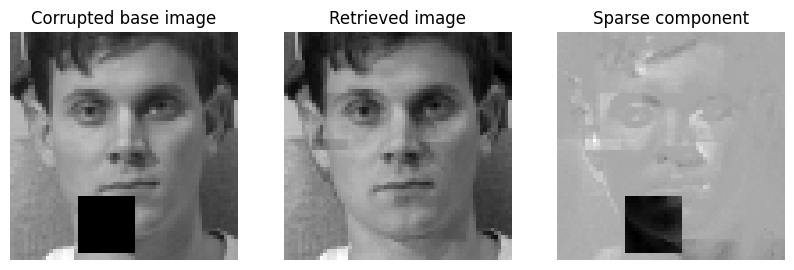

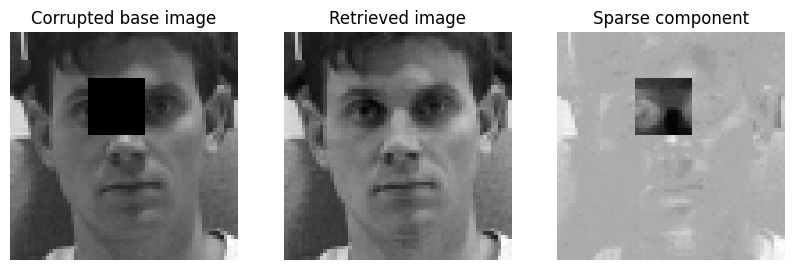

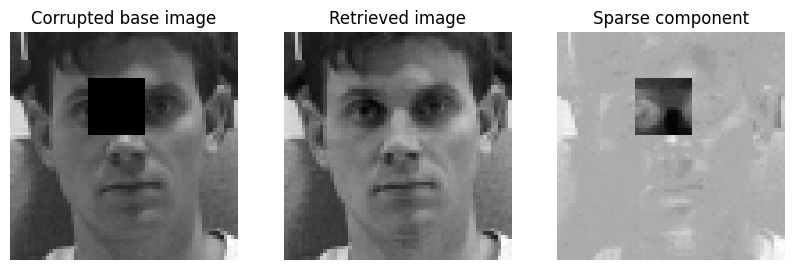

(20, 64, 64)
Training RobustPCA model for shadow removing...


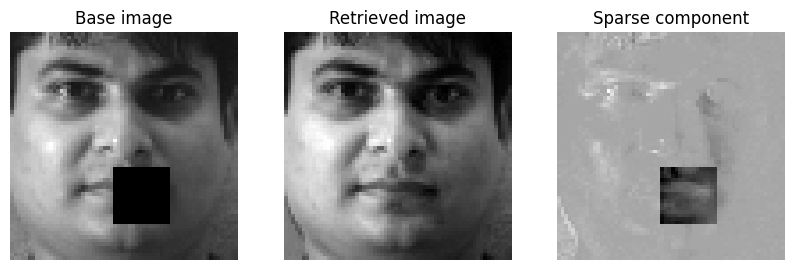

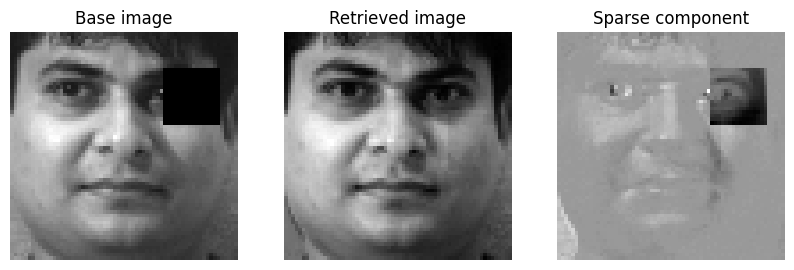

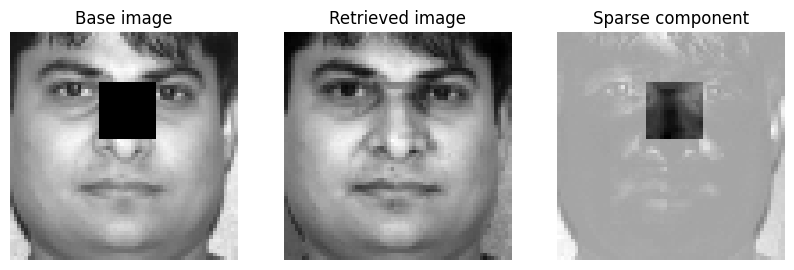

In [26]:
possible_tasks = ['Unmasking', 'Shadow removing', 'Recovering artificial dataset']
possible_models = ['RobustPCA']

model_name = 'RobustPCA'

save = False

evaluation.evaluate(model_name=model_name, task='Unmasking', save=False)
evaluation.evaluate(model_name=model_name, task='Shadow removing', save=save)
# evaluation.evaluate(model_name=model_name, task='Recovering artificial dataset', choosen_scheme='random', save=save)
# evaluation.evaluate(model_name=model_name, task='Recovering artificial dataset', choosen_scheme='coherent', save=save)

Loading the AT&T dataset...


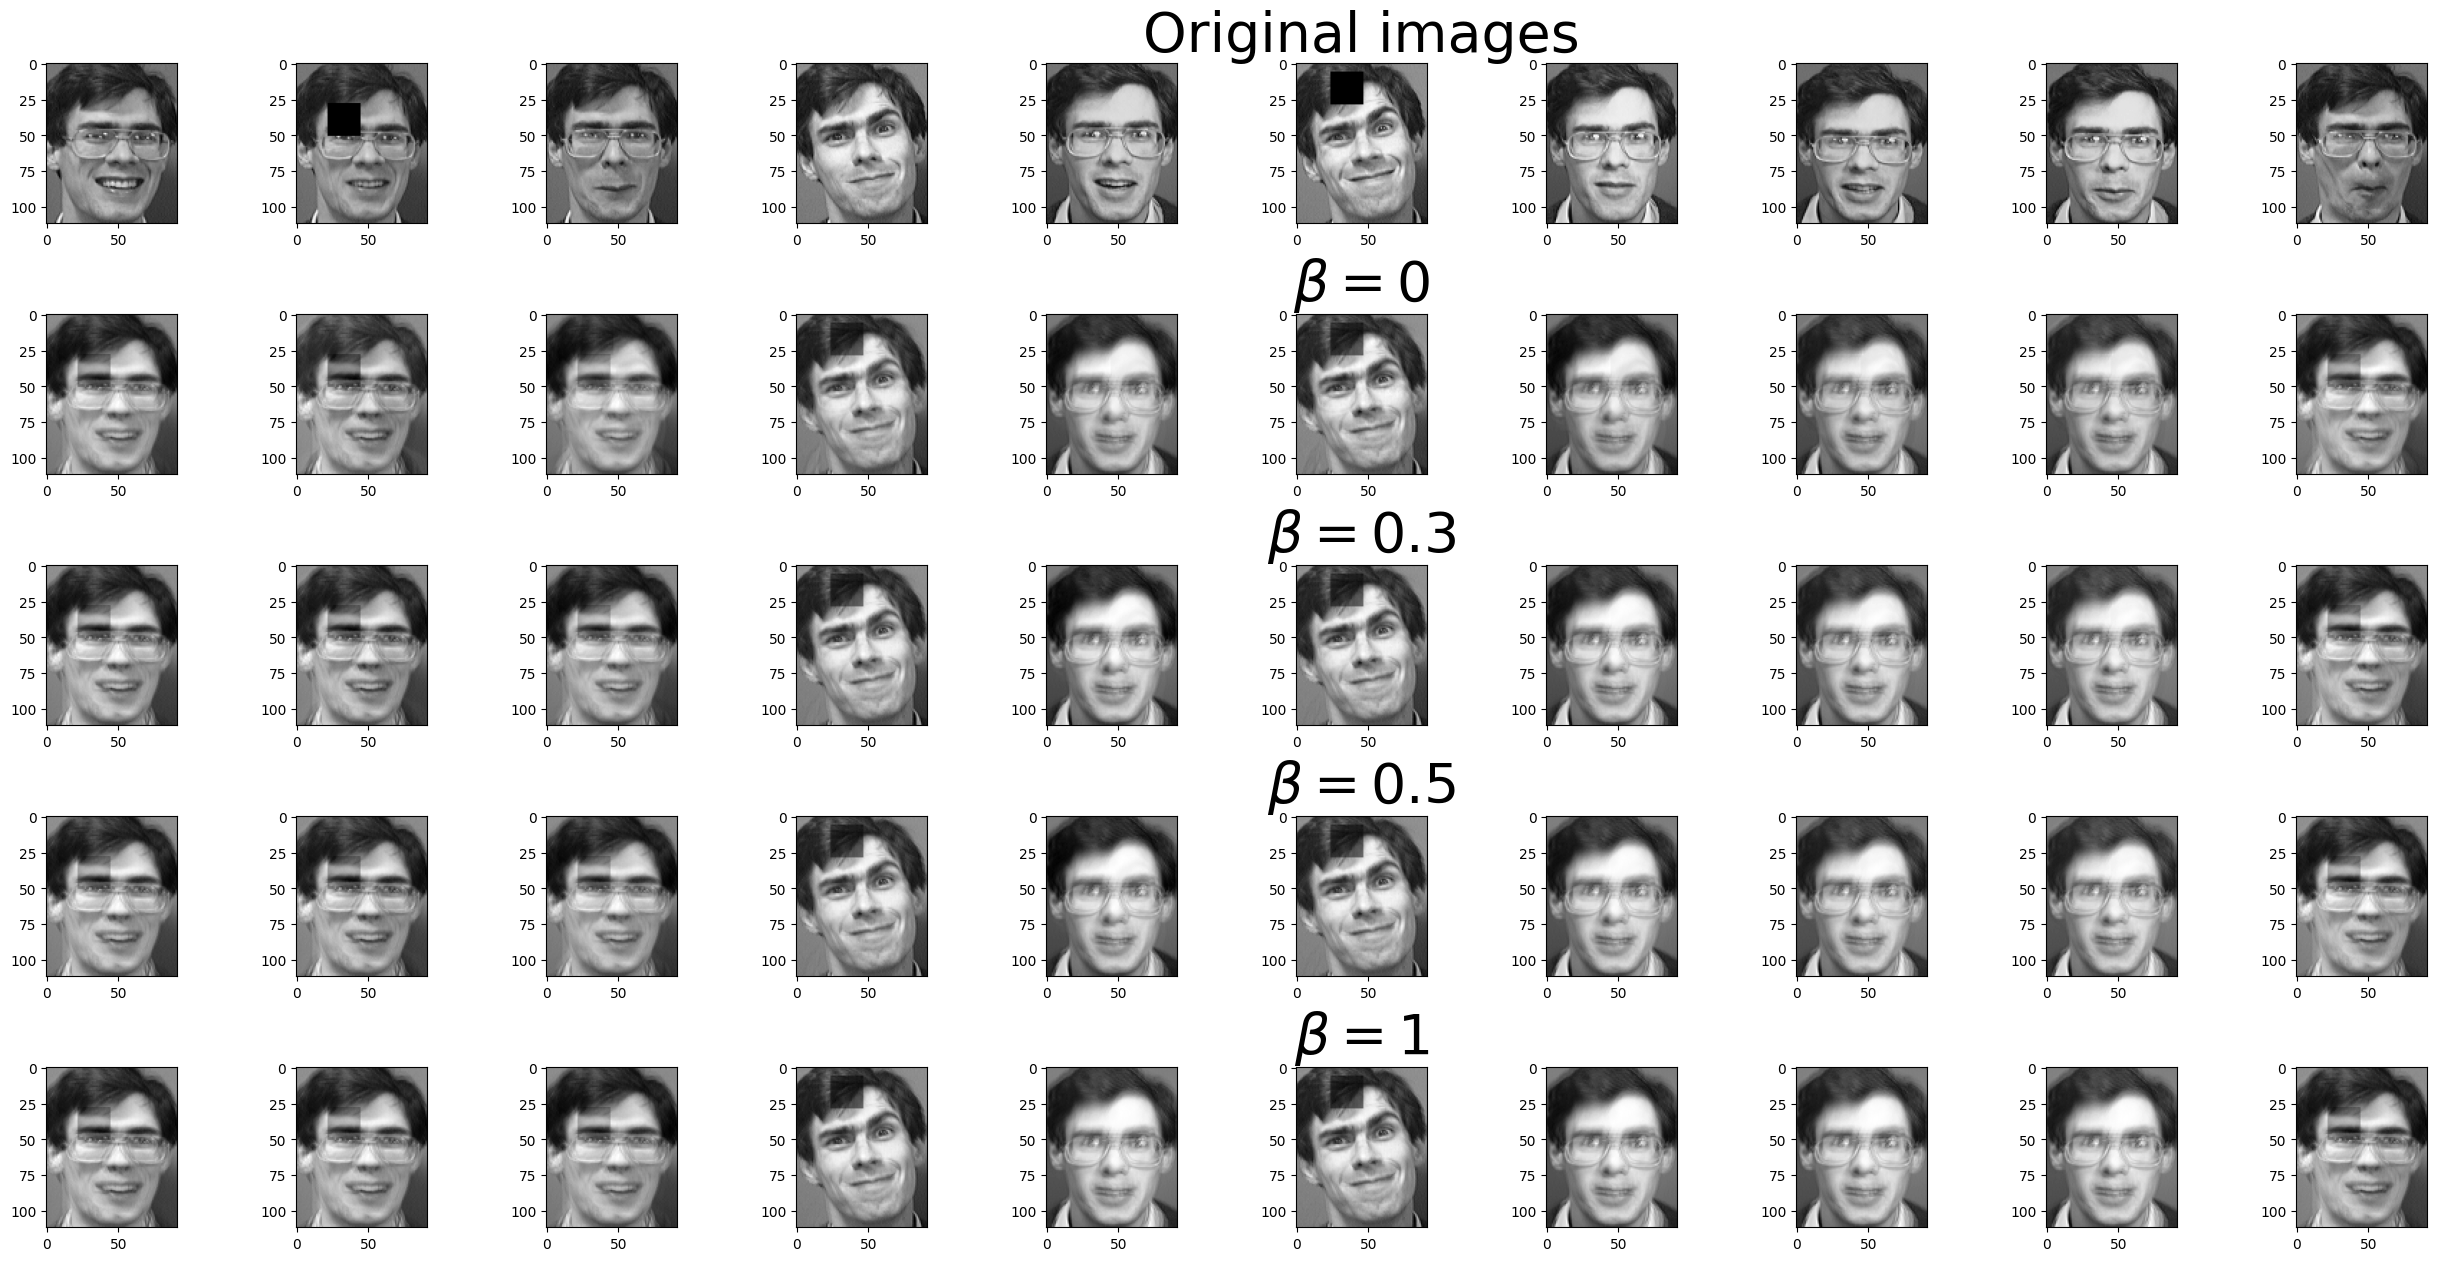

Loading the PIE dataset...


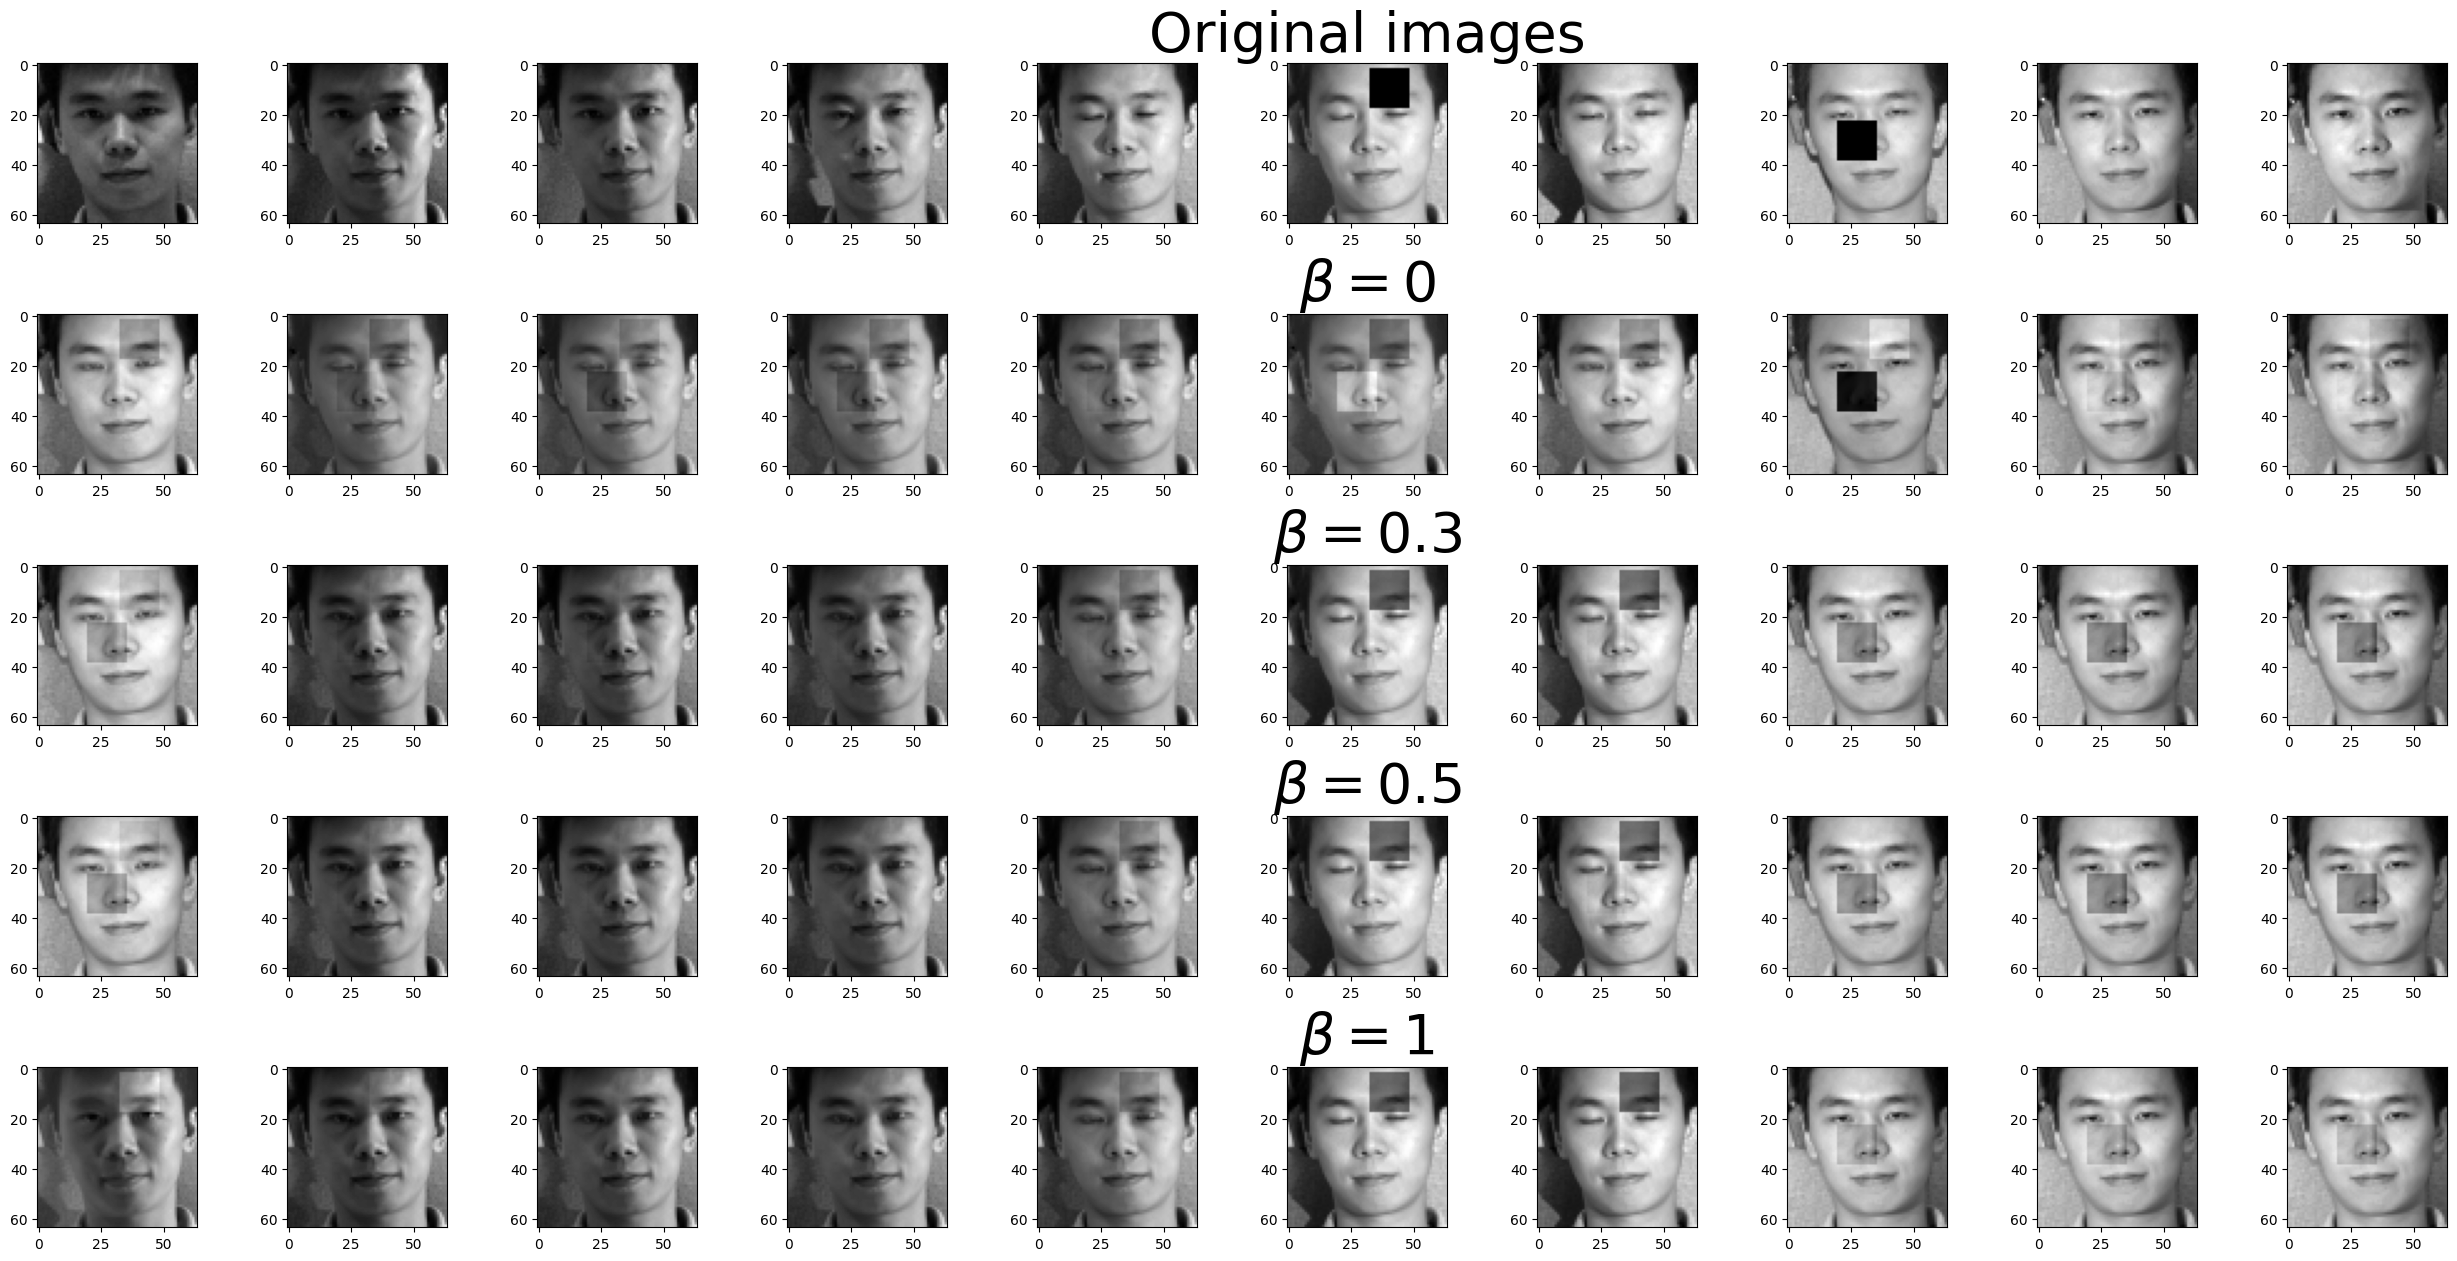

In [28]:
save = False
evaluation.evaluate_GLPCA(save=save, dataset="att")
evaluation.evaluate_GLPCA(save=save, dataset="pie")

## Example Application of rGLPCA

Loading the AT&T dataset...


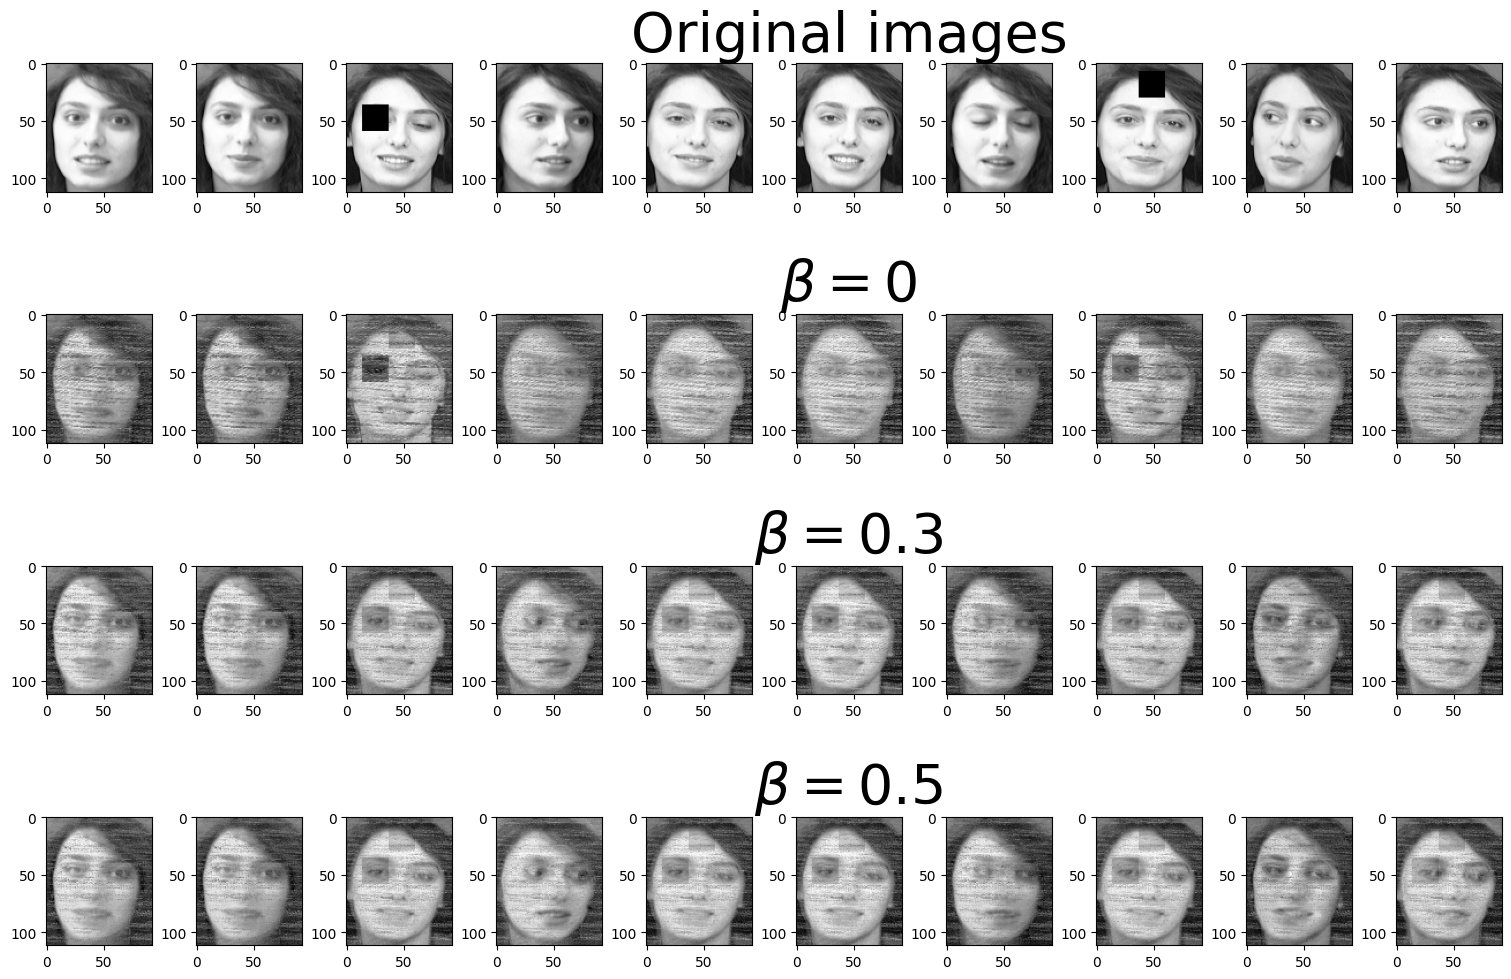

In [30]:
save = False
evaluation.evaluate_RGLPCA(save=save, dataset="att")

Loading the PIE dataset...


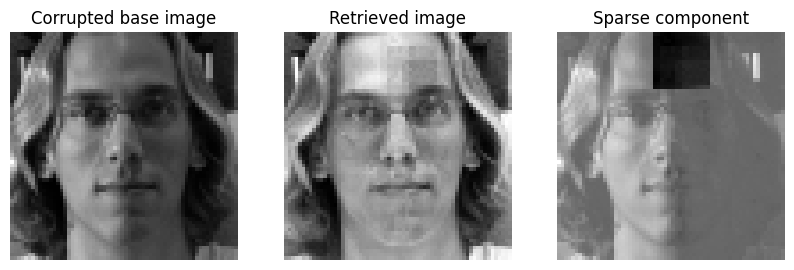

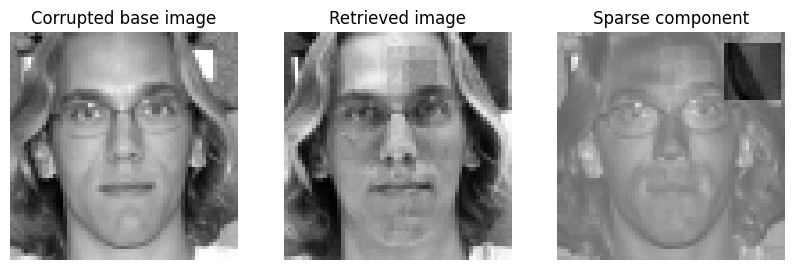

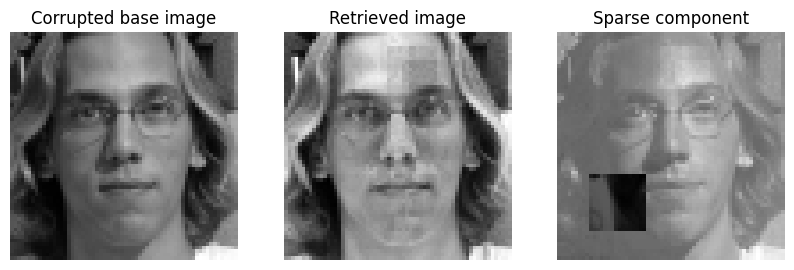

In [33]:
evaluation.evaluate_OURPCA(dataset='pie')